## Viz. of the analysis script

In [1]:
# system dependencies
import os
import sys


# library dependencies
import duckdb as ddb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# local dependencies


### Plot settings

In [2]:
####################
#### SEABORN #######
####################
# seaborn settings
sns.set_context('talk')
sns.set_style('whitegrid')


####################
#### matplotlib ####
####################
# %config InlineBackend.figure.format = 'retina'
# %matplotlib inline

# # matplotlib settings
# plt.rcParams.update({
#     'font.family': 'Arial',  # Times New Roman, Calibri
#     'font.weight': 'normal',
#     'mathtext.fontset': 'cm',
#     'font.size': 16,
#     'lines.linewidth': 2,
#     'axes.linewidth': 2,
#     'axes.spines.top': False,
#     'axes.spines.right': False,
#     'axes.titleweight': 'bold',
#     'axes.titlesize': 18,
#     'axes.labelweight': 'bold',
#     'xtick.major.size': 8,
#     'xtick.major.width': 2,
#     'ytick.major.size': 8,
#     'ytick.major.width': 2,
#     'figure.dpi': 80,
#     'legend.framealpha': 1, 
#     'legend.edgecolor': 'black',
#     'legend.fancybox': False,
#     'legend.fontsize': 14
# })

# ####################

### Obtaining data
#### Cross-entropy

In [3]:
entropy_10 = pd.read_csv('../data/analysis/cross_entropy_1e-10.txt', sep=' ', header=None)
entropy_05 = pd.read_csv('../data/analysis/cross_entropy_1e-05.txt', sep=' ', header=None) 
entropy_03 = pd.read_csv('../data/analysis/cross_entropy_1e-03.txt', sep=' ', header=None)
entropy_01 = pd.read_csv('../data/analysis/cross_entropy_1e-01.txt', sep=' ', header=None)

In [4]:
first_df = pd.concat([entropy_10, entropy_05, entropy_03, entropy_01], axis=0)

In [5]:
first_df

,0,1
0,Cross-Entropy:,9.333300
0,Cross-Entropy:,6.493192
0,Cross-Entropy:,4.517469
0,Cross-Entropy:,2.176217


Need to add column e_value

In [6]:
dict_to_series = {"e_value": [1e-10, 1e-5, 1e-3, 1e-1]}

In [7]:
dict_to_series

{'e_value': [1e-10, 1e-05, 0.001, 0.1]}

In [8]:
e_values_df = pd.DataFrame(dict_to_series)

In [9]:
concat_df = pd.concat([first_df, e_values_df], ignore_index=True)

In [10]:
concat_df

,0,1,e_value
0,Cross-Entropy:,9.414953,NaN
1,Cross-Entropy:,5.111654,NaN
2,Cross-Entropy:,3.109860,NaN
3,Cross-Entropy:,2.544782,NaN
4,NaN,NaN,1.000000e-10
5,NaN,NaN,1.000000e-05
6,NaN,NaN,1.000000e-03
7,NaN,NaN,1.000000e-01


Becoming lazy. I will input it manually

In [6]:
cross_entropy_data = {"e_value":[1e-10, 1e-5, 1e-3, 1e-1],
"cross-entropy":[9.333300, 6.493192, 4.517469, 2.176217]}

In [7]:
plotting_data_1 = pd.DataFrame(cross_entropy_data)

In [8]:
plotting_data_1['log_e_value'] = np.log(plotting_data_1['e_value'])

#### Plotting cross-entropy

Text(0, 0.5, 'Cross Entropy $(\\sigma)$')

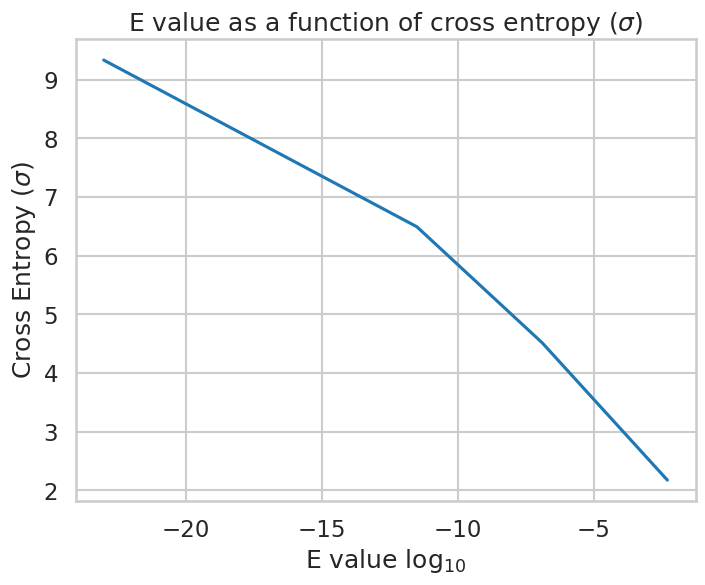

In [9]:
fig, ax = plt.subplots(figsize=(8,6)) # setting up the subplots
sns.lineplot(data=plotting_data_1, x="log_e_value", y="cross-entropy")
# ax.set_xlim(0,0.05)
ax.set_title('E value as a function of cross entropy $(\sigma)$')
ax.set_xlabel("E value $\log_{10}$")
ax.set_ylabel("Cross Entropy $(\sigma)$")

#### ROC-curve

In [10]:
roc_1e10 = pd.read_csv('../data/analysis/roc_curve_data_1e-10.csv')
roc_1e05 = pd.read_csv('../data/analysis/roc_curve_data_1e-05.csv')
roc_1e03 = pd.read_csv('../data/analysis/roc_curve_data_1e-03.csv')
roc_1e01 = pd.read_csv('../data/analysis/roc_curve_data_1e-01.csv')

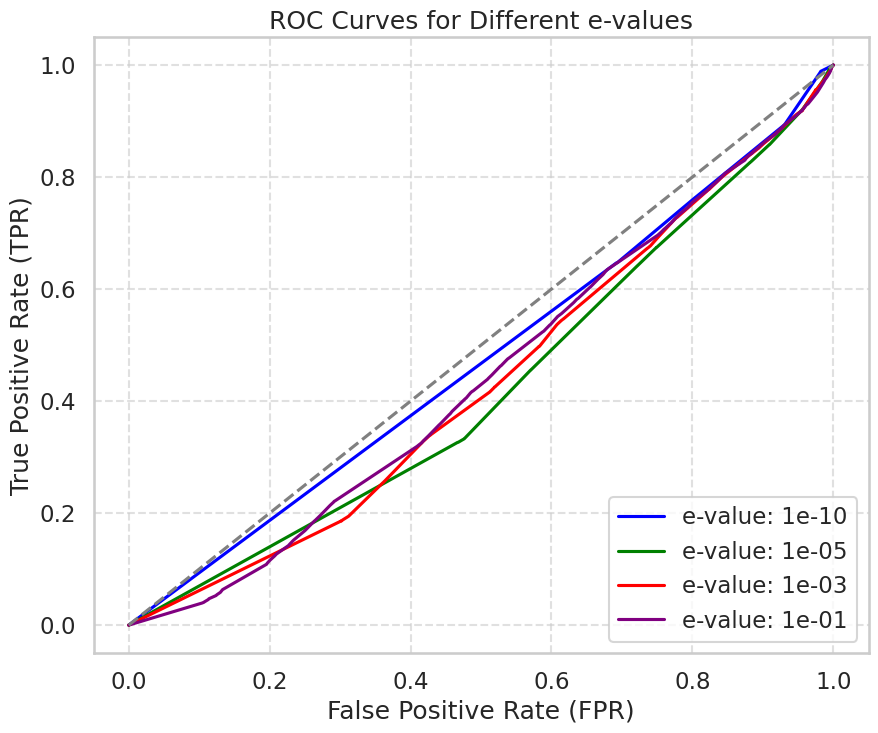

In [11]:
# plotting
fig, ax = plt.subplots(figsize=(10,8)) # setting up the subplots

plt.plot(roc_1e10['FPR'], roc_1e10['TPR'], label="e-value: 1e-10", color='blue')
plt.plot(roc_1e05['FPR'], roc_1e05['TPR'], label="e-value: 1e-05", color='green')
plt.plot(roc_1e03['FPR'], roc_1e03['TPR'], label="e-value: 1e-03", color='red')
plt.plot(roc_1e01['FPR'], roc_1e01['TPR'], label="e-value: 1e-01", color='purple')

# Add labels, title, and legend
ax.set_title("ROC Curves for Different e-values")
ax.set_xlabel("False Positive Rate (FPR)")
ax.set_ylabel("True Positive Rate (TPR)")
ax.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)

# Plot the line of no discrimination (diagonal line)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.show()